# Data

Observed inflorescences each day

In [1]:
v = [142, 181, 219, 258, 297, 336, 374, 413, 428, 443, 458, 474, 489, 504, 519, 542, 564, 587, 610, 633, 655, 678, 655, 632, 610, 587, 564, 542, 519, 496, 770, 1044, 1033, 1023, 1012, 1002, 991, 947, 903, 1154, 1404, 1655, 1906, 2199, 2492, 2785, 2921, 3056, 3192, 3327, 3463, 4044, 4626, 4901, 5176, 5450, 5725, 6000, 5547, 5094, 5143, 5192, 5242, 5291, 5340, 4886, 4431, 4589, 4746, 4904, 5062, 4563, 4063, 3564, 3291, 3018, 2745, 2472, 2170, 1869, 1567]

In [2]:
def plot_data():
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()
    ax.plot(v,label='observed', linewidth=3)
    ax.set_ylabel('population')
    ax.legend()

    plt.show()

In [3]:
import numpy as np
import scipy

In [4]:
plot_data()

<Figure size 640x480 with 1 Axes>

# First model

We consider that the population of inflorescences follows a dynamic modelled with the following equation

$I_t = J_t + \sum^{50}_{j=1}J_{t-j}\prod(1-\alpha_{t-j})$

In [5]:
def estimate(J, alpha):
    I = list(J)
    for i, ival in enumerate(J) :
        for j in range(i-1,max(0,i-50),-1):
            oi = J[j]
            for d in range(j+mindeathdelay,i+1):
                oi *= (1-alpha[d])
            I[i] += oi
    return I

# Second model

We consider that the population of inflorescences follows a dynamic modelled with the following equation

$I_t = J_t + \sum^{50}_{j=1}J_{t-j} \times (1-F(\mu=29,\sigma=14,t-j))$



In [49]:
from scipy.stats import norm

ncdf = [norm.cdf(i,loc = 29, scale = 14) for i in range(50)]

def estimate(J):
    I = list(J)
    for i, ival in enumerate(J) :
        for j in range(i-1,max(0,i-50),-1):
            oi = J[j] * (1 - ncdf[i-j])
            I[i] += oi
    return I

# Optimisation

In [7]:
def opt(args):
    J = args
    I = estimate(J)
    I = np.array(I)
    dI = pow(I - v,2)
    return sum(dI) 


def find_parameters():
    from scipy.optimize import minimize
    
    J = [1 for i in v]

    res = minimize(opt, J, bounds = [(0,np.inf) for i in v])
    print(list(res.x))
    return list(res.x)


# Plotting

In [8]:
def estimate_death(J):
    I  = estimate(J)
    return [(I[i-1] if i >0 else J[i]) + J[i] -vi for i,vi in enumerate(I)]

def plot_estimate(args):
    import matplotlib.pyplot as plt
    J = args
    I = estimate(J)
    D = estimate_death(J)
    fig, ax = plt.subplots()
    ax.plot(v,label='observed', linewidth=3)
    ax.plot(I,label='simulated')
    ax.plot(J,label='sim. burst')
    #ax.plot(D2,label='sim. dead', color='b', linewidth=3)
    #ax.plot(D,label='sim. dead', color='r')
    #ax.plot(np.cumsum(J),label='sim. cum burst')
    #ax.plot(np.cumsum(D),label='sim. cum dead')
    #ax.plot(B, label = "burst observed")
    ax.set_ylabel('population')
    ax.legend()

    plt.show()

# Execution

In [9]:
optarg = find_parameters()
#print opt(optarg)


[141.83717501701216, 186.61685966043842, 43.397502231256574, 42.01654636155535, 42.1201112558702, 42.58352614250776, 38.157933381409, 15.608214805010894, 43.152432150205094, 46.518566317098276, 12.279057242782091, 11.445006898901402, 11.390289658545036, 7.803458488046853, 6.791295955373263, 51.07308670550522, 53.43826558955274, 11.544196996076769, 8.19299059427569, 5.128895018051598, 1.7572648734573757, 48.942884094662745, 7.45342005714845, 6.815286122096723, 0.0, 0.0, 0.0, 1.400032466838964, 6.766560235302725, 9.664361981235738, 306.77549358516495, 237.35631939295024, 14.84682427345264, 12.518053323539883, 12.618406562870687, 12.390872429223666, 0.0, 0.0, 0.0, 260.3787782694996, 284.14846304108045, 287.26840981956394, 289.2455374104506, 332.90505271282586, 336.0809211761108, 338.56388344803463, 184.33501067813043, 181.97243086900983, 185.76091640638427, 186.99640075150566, 191.04720847637248, 651.20222863993, 654.591725760881, 352.3153258480071, 351.04077403236084, 354.1827494395522, 

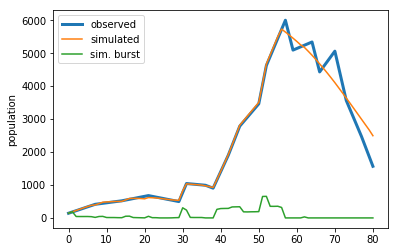

In [10]:
plot_estimate(optarg)


In [11]:
import pandas as pd
import numpy as np
inflos_ER = np.array(pd.read_csv("inflos_corrigees.csv").inflos_ER)
inflos_PS = np.array(pd.read_csv("inflos_corrigees.csv").inflos_PS)
inflos_EH = np.array(pd.read_csv("inflos_corrigees.csv").inflos_EH)
burst_ER = np.array(pd.read_csv("burst.csv").burstER)
burst_PS = np.array(pd.read_csv("burst.csv").burstPS)
burst_EH = np.array(pd.read_csv("burst.csv").burstEH)
inflosER = np.array(pd.read_csv("r1.csv").inflos_vivantes)
inflosPS = np.array(pd.read_csv("b1.csv").inflos_vivantes)
inflosEH = np.array(pd.read_csv("h1.csv").inflos_vivantes)

[350.0134343452573, 453.0494680425028, 111.41292783253148, 105.4176075524184, 106.14146989801527, 106.88419984201273, 107.92798314266074, 27.862121398660715, 26.76922996155252, 25.358363282095244, 25.54519926027305, 26.41473950792908, 27.007805792169464, 28.189144320188845, 122.8007618803285, 128.3152149460844, 101.53006793971205, 102.33544605578878, 104.74898408664677, 102.96824259332047, 121.16128750960435, 134.7787425587716, 137.86280269690303, 137.01578907675332, 139.7596137548663, 142.57200716958042, 145.70417381412688, 154.58366499420154, 37.24443126919395, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 46.82048999967827, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 89.78342873052377, 144.49181086038928, 135.12353798107915, 132.69392868814563, 131.2803785071253, 129.6511363926496, 127.96846943359883, 79.59601412352224, 76.77659518316676, 6.2627699110336845, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.67835733741944, 36.910199285431624, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

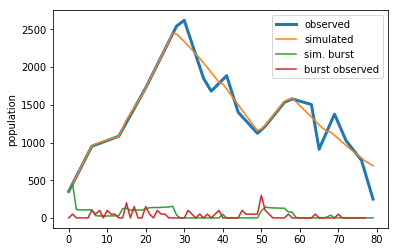

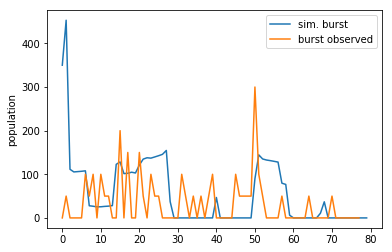

In [61]:
v = inflosER
B = burst_ER * 50
opt_args_ER = find_parameters()
plot_estimate(opt_args_ER)
plot_estimate_burst(opt_args_ER)

[231.35134498309577, 263.1403688655092, 35.519398739122536, 31.215276884534056, 31.79127788960595, 31.583174941078404, 27.640386994722814, 14.635660924044249, 14.993744364076822, 6.1507722412770045, 5.63795948726839, 0.7257925024988745, 0.0, 0.0, 75.4595353180211, 82.00232081716146, 17.8869887330277, 22.031034975909087, 22.79195886181951, 10.221408347499747, 57.75228834845634, 7.847338390478435, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 17.390700893578728, 10.609708410549484, 0.0, 19.363579198503697, 39.87554903766926, 40.48034835461954, 21.077981753081588, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.623219674981039, 120.08536501224773, 122.45307526157539, 116.3976867246767, 116.15027405087227, 116.60636777369129, 116.8083064709301, 116.82490644302892, 533.106536317362, 560.4567648461133, 140.00994342817992, 132.54929197450312, 133.98619823729632, 133.91811097302968, 73.78742001818966, 0.0, 0.0, 51.87075831583061, 54.81638852567342, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 106.45969010628332, 148.99610796959686, 0.

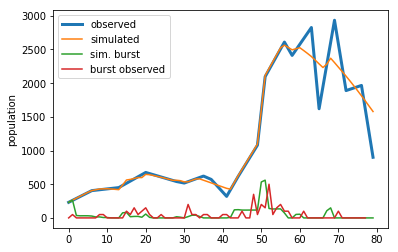

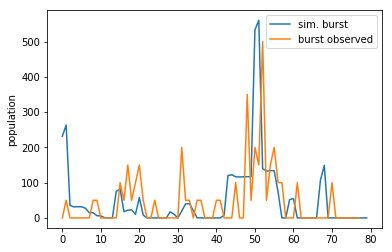

In [62]:
v = inflosPS
B = burst_PS * 50
opt_args_PS = find_parameters()
plot_estimate(opt_args_PS)
plot_estimate_burst(opt_args_PS)

[180.25526992154695, 226.4936275997441, 45.307288331510335, 41.830591828513484, 42.459873262367445, 41.513904182456194, 16.444664672369008, 48.81911577305092, 51.78093673625543, 23.632431806994763, 22.215401686226823, 21.092401323262774, 19.75710680770917, 18.939874846341613, 57.85483855055529, 61.264141439995974, 18.558375145392965, 15.228234310169707, 12.339015543243248, 10.107907329043584, 56.57018423922785, 69.7204379136405, 73.39554865212266, 60.48088882226898, 62.52913543682146, 65.04068749631428, 67.8495593231891, 72.64188499930185, 54.048468319005345, 0.0, 0.0, 0.0, 0.0, 13.74297566369447, 18.78743554547672, 8.201569977850445, 0.0, 0.0, 272.0025461613084, 291.05531639789984, 293.04305813638183, 295.13692413595504, 339.0804362944493, 342.20498733445817, 344.48633781059795, 189.67182503217072, 188.37403396318862, 190.65850372114684, 192.83008224721402, 195.24765293695233, 643.2649930205931, 671.037358038544, 356.2633431972951, 353.73502886675954, 358.28397128334166, 356.009337291

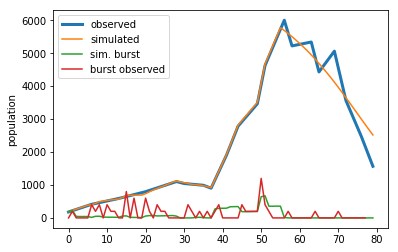

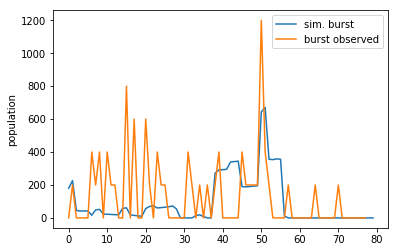

In [64]:
v = inflosEH
B = burst_ER * 200
opt_args_EH = find_parameters()
plot_estimate(opt_args_EH)
plot_estimate_burst(opt_args_EH)

In [47]:
print(burst_PS)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


In [50]:
def plot_estimate_burst(args):
    import matplotlib.pyplot as plt
    J = args
    I = estimate(J)
    D = estimate_death(J)
    fig, ax = plt.subplots()
    #ax.plot(v,label='observed', linewidth=3)
    #ax.plot(I,label='simulated')
    ax.plot(J,label='sim. burst')
    #ax.plot(D2,label='sim. dead', color='b', linewidth=3)
    #ax.plot(D,label='sim. dead', color='r')
    #ax.plot(np.cumsum(J),label='sim. cum burst')
    #ax.plot(np.cumsum(D),label='sim. cum dead')
    ax.plot(B, label = "burst observed")
    ax.set_ylabel('population')
    ax.legend()

    plt.show()

[350.0134343452573, 453.0494680425028, 111.41292783253148, 105.4176075524184, 106.14146989801527, 106.88419984201273, 107.92798314266074, 27.862121398660715, 26.76922996155252, 25.358363282095244, 25.54519926027305, 26.41473950792908, 27.007805792169464, 28.189144320188845, 122.8007618803285, 128.3152149460844, 101.53006793971205, 102.33544605578878, 104.74898408664677, 102.96824259332047, 121.16128750960435, 134.7787425587716, 137.86280269690303, 137.01578907675332, 139.7596137548663, 142.57200716958042, 145.70417381412688, 154.58366499420154, 37.24443126919395, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 46.82048999967827, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 89.78342873052377, 144.49181086038928, 135.12353798107915, 132.69392868814563, 131.2803785071253, 129.6511363926496, 127.96846943359883, 79.59601412352224, 76.77659518316676, 6.2627699110336845, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.67835733741944, 36.910199285431624, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

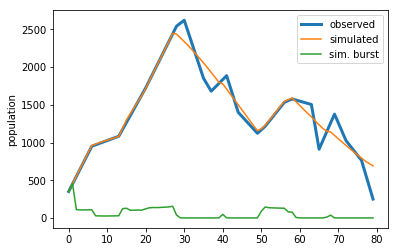

[350.0134343452573, 453.0494680425028, 111.41292783253148, 105.4176075524184, 106.14146989801527, 106.88419984201273, 107.92798314266074, 27.862121398660715, 26.76922996155252, 25.358363282095244, 25.54519926027305, 26.41473950792908, 27.007805792169464, 28.189144320188845, 122.8007618803285, 128.3152149460844, 101.53006793971205, 102.33544605578878, 104.74898408664677, 102.96824259332047, 121.16128750960435, 134.7787425587716, 137.86280269690303, 137.01578907675332, 139.7596137548663, 142.57200716958042, 145.70417381412688, 154.58366499420154, 37.24443126919395, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 46.82048999967827, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 89.78342873052377, 144.49181086038928, 135.12353798107915, 132.69392868814563, 131.2803785071253, 129.6511363926496, 127.96846943359883, 79.59601412352224, 76.77659518316676, 6.2627699110336845, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.67835733741944, 36.910199285431624, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [12]:
v = inflosER
opt_argsER = find_parameters()
plot_estimate(opt_argsER)
print(opt_argsER)

[231.35134498309577, 263.1403688655092, 35.519398739122536, 31.215276884534056, 31.79127788960595, 31.583174941078404, 27.640386994722814, 14.635660924044249, 14.993744364076822, 6.1507722412770045, 5.63795948726839, 0.7257925024988745, 0.0, 0.0, 75.4595353180211, 82.00232081716146, 17.8869887330277, 22.031034975909087, 22.79195886181951, 10.221408347499747, 57.75228834845634, 7.847338390478435, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 17.390700893578728, 10.609708410549484, 0.0, 19.363579198503697, 39.87554903766926, 40.48034835461954, 21.077981753081588, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.623219674981039, 120.08536501224773, 122.45307526157539, 116.3976867246767, 116.15027405087227, 116.60636777369129, 116.8083064709301, 116.82490644302892, 533.106536317362, 560.4567648461133, 140.00994342817992, 132.54929197450312, 133.98619823729632, 133.91811097302968, 73.78742001818966, 0.0, 0.0, 51.87075831583061, 54.81638852567342, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 106.45969010628332, 148.99610796959686, 0.

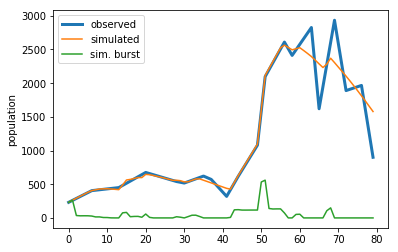

[231.35134498309577, 263.1403688655092, 35.519398739122536, 31.215276884534056, 31.79127788960595, 31.583174941078404, 27.640386994722814, 14.635660924044249, 14.993744364076822, 6.1507722412770045, 5.63795948726839, 0.7257925024988745, 0.0, 0.0, 75.4595353180211, 82.00232081716146, 17.8869887330277, 22.031034975909087, 22.79195886181951, 10.221408347499747, 57.75228834845634, 7.847338390478435, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 17.390700893578728, 10.609708410549484, 0.0, 19.363579198503697, 39.87554903766926, 40.48034835461954, 21.077981753081588, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.623219674981039, 120.08536501224773, 122.45307526157539, 116.3976867246767, 116.15027405087227, 116.60636777369129, 116.8083064709301, 116.82490644302892, 533.106536317362, 560.4567648461133, 140.00994342817992, 132.54929197450312, 133.98619823729632, 133.91811097302968, 73.78742001818966, 0.0, 0.0, 51.87075831583061, 54.81638852567342, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 106.45969010628332, 148.99610796959686, 0.

In [13]:
v = inflosPS
opt_argsPS = find_parameters()
plot_estimate(opt_argsPS)
print(opt_argsPS)

[180.25526992154695, 226.4936275997441, 45.307288331510335, 41.830591828513484, 42.459873262367445, 41.513904182456194, 16.444664672369008, 48.81911577305092, 51.78093673625543, 23.632431806994763, 22.215401686226823, 21.092401323262774, 19.75710680770917, 18.939874846341613, 57.85483855055529, 61.264141439995974, 18.558375145392965, 15.228234310169707, 12.339015543243248, 10.107907329043584, 56.57018423922785, 69.7204379136405, 73.39554865212266, 60.48088882226898, 62.52913543682146, 65.04068749631428, 67.8495593231891, 72.64188499930185, 54.048468319005345, 0.0, 0.0, 0.0, 0.0, 13.74297566369447, 18.78743554547672, 8.201569977850445, 0.0, 0.0, 272.0025461613084, 291.05531639789984, 293.04305813638183, 295.13692413595504, 339.0804362944493, 342.20498733445817, 344.48633781059795, 189.67182503217072, 188.37403396318862, 190.65850372114684, 192.83008224721402, 195.24765293695233, 643.2649930205931, 671.037358038544, 356.2633431972951, 353.73502886675954, 358.28397128334166, 356.009337291

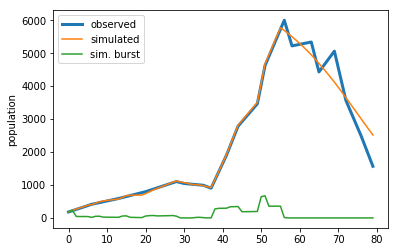

[180.25526992154695, 226.4936275997441, 45.307288331510335, 41.830591828513484, 42.459873262367445, 41.513904182456194, 16.444664672369008, 48.81911577305092, 51.78093673625543, 23.632431806994763, 22.215401686226823, 21.092401323262774, 19.75710680770917, 18.939874846341613, 57.85483855055529, 61.264141439995974, 18.558375145392965, 15.228234310169707, 12.339015543243248, 10.107907329043584, 56.57018423922785, 69.7204379136405, 73.39554865212266, 60.48088882226898, 62.52913543682146, 65.04068749631428, 67.8495593231891, 72.64188499930185, 54.048468319005345, 0.0, 0.0, 0.0, 0.0, 13.74297566369447, 18.78743554547672, 8.201569977850445, 0.0, 0.0, 272.0025461613084, 291.05531639789984, 293.04305813638183, 295.13692413595504, 339.0804362944493, 342.20498733445817, 344.48633781059795, 189.67182503217072, 188.37403396318862, 190.65850372114684, 192.83008224721402, 195.24765293695233, 643.2649930205931, 671.037358038544, 356.2633431972951, 353.73502886675954, 358.28397128334166, 356.009337291

In [14]:
v = inflosEH
opt_argsEH = find_parameters()
plot_estimate(opt_argsEH)
print(opt_argsEH)

In [73]:
ncdf2 = [norm.cdf(i,loc = 22, scale = 14) for i in range(50)]

def estimate_corrected(J):
    I = list(J)
    for i, ival in enumerate(J) :
        for j in range(i-1,max(0,i-50),-1):
            oi = J[j] * (1 - ncdf2[i-j])
            I[i] += oi
    return I

def plot_estimate_corrected(args):
    import matplotlib.pyplot as plt
    J = args
    I = estimate_corrected(J)
    H = estimate_corrected3(J)
    fig, ax = plt.subplots()
    ax.plot(v,label='observed', linewidth=3)
    ax.plot(I,label='simulated')
    ax.plot(H,label='sd.min')
    #ax.plot(D2,label='sim. dead', color='b', linewidth=3)
    #ax.plot(D,label='sim. dead', color='r')
    #ax.plot(np.cumsum(J),label='sim. cum burst')
    #ax.plot(np.cumsum(D),label='sim. cum dead')
    #ax.plot(B, label = "burst observed")
    ax.set_ylabel('population')
    ax.legend()

    plt.show()

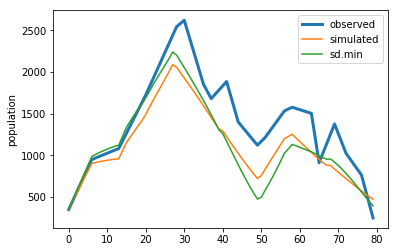

In [81]:
v = inflosER
plot_estimate_corrected(opt_argsER)

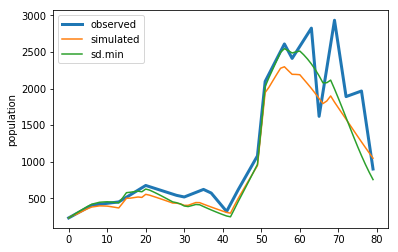

In [82]:
v = inflosPS
plot_estimate_corrected(opt_argsPS)

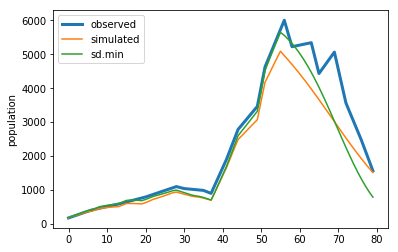

In [83]:
v = inflosEH
plot_estimate_corrected(opt_argsEH)

In [23]:
print(estimate_corrected(opt_argsER))
print(estimate_corrected(opt_argsPS))
print(estimate_corrected(opt_argsEH))

[350.0134343452573, 453.0494680425028, 534.1954288787697, 627.749662420209, 720.8666432977968, 813.0347254939581, 904.4099945683804, 913.7168862258557, 925.1978013775813, 933.9015336248252, 941.4064765520966, 948.2614542980571, 954.1135418769834, 959.5433252752953, 1057.9298300965015, 1153.9288260945978, 1220.288506568915, 1286.6365332707996, 1352.9352269750543, 1414.847949265763, 1492.5876332437656, 1580.2518905126547, 1667.4374864014753, 1750.7767219456457, 1834.0793850513282, 1917.1725443638097, 2000.3419460908422, 2089.286432452599, 2057.375380107273, 1993.0532891270568, 1929.357349954992, 1864.2879153657673, 1798.0184856263697, 1730.7329796652527, 1662.6246165773518, 1593.8946807948016, 1524.751170378296, 1455.4073296846361, 1386.0800702860085, 1316.9882873864883, 1295.1715729682985, 1224.0784554189197, 1156.5424060378443, 1090.0516229210286, 1024.804627187324, 960.9908731128195, 898.7889569012149, 838.3649244712789, 779.8707133903748, 723.4427629088113, 758.984252264357, 835.2171

In [80]:
ncdf3 = [norm.cdf(i,loc = 22, scale = 7) for i in range(50)]

def estimate_corrected3(J):
    I = list(J)
    for i, ival in enumerate(J) :
        for j in range(i-1,max(0,i-50),-1):
            oi = J[j] * (1 - ncdf3[i-j])
            I[i] += oi
    return I

def plot_estimate_corrected3(args):
    import matplotlib.pyplot as plt
    J = args
    I = estimate_corrected3(J)
    fig, ax = plt.subplots()
    ax.plot(v,label='observed', linewidth=3)
    ax.plot(I,label='simulated')
    ax.plot(J,label='sim. burst')
    #ax.plot(D2,label='sim. dead', color='b', linewidth=3)
    #ax.plot(D,label='sim. dead', color='r')
    #ax.plot(np.cumsum(J),label='sim. cum burst')
    #ax.plot(np.cumsum(D),label='sim. cum dead')
    #ax.plot(B, label = "burst observed")
    ax.set_ylabel('population')
    ax.legend()

    plt.show()

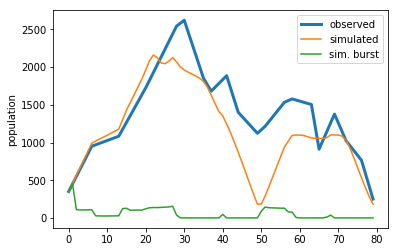

In [52]:
v = inflosER
plot_estimate_corrected3(opt_argsER)

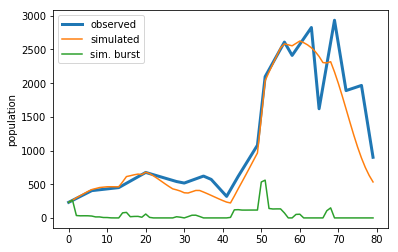

In [46]:
v = inflosPS
plot_estimate_corrected3(opt_argsPS)

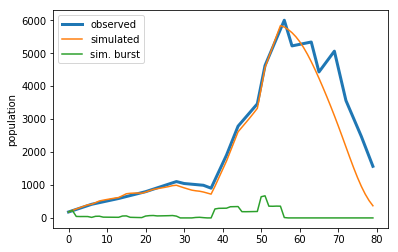

In [47]:
v = inflosEH
plot_estimate_corrected3(opt_argsEH)

In [48]:
print(estimate_corrected3(opt_argsER))
print(estimate_corrected3(opt_argsPS))
print(estimate_corrected3(opt_argsEH))

[350.0134343452573, 453.0494680425028, 564.4623614208011, 669.8798650872013, 776.0209725827876, 882.9039822471173, 990.8282895619118, 1018.6797332538997, 1045.4197925209548, 1070.7031714891207, 1096.0670019880276, 1122.068873293526, 1148.1919265753518, 1174.595743416467, 1294.0030062679602, 1416.2398335497012, 1507.505103698297, 1593.4879670731539, 1673.6446924902182, 1741.6708963674496, 1815.8785514760148, 1890.9150138900986, 1956.6978637409477, 2011.1033549004633, 2060.727793312113, 2109.410767260036, 2161.398057504326, 2225.8764521494463, 2179.054350487624, 2102.1335028007784, 2032.0923130183435, 1967.47080553347, 1905.9621083115542, 1844.8452057198074, 1781.4195119862727, 1713.3679395400952, 1638.9960807076793, 1557.325581682323, 1468.055577731848, 1371.4381199969516, 1314.9514239998462, 1205.9069968293225, 1092.3320158253132, 975.7148695133458, 857.8849474503478, 741.0478316838141, 627.7421063419296, 520.6862134637282, 422.52091635799366, 335.49267713481794, 350.93491477182613, 43

In [24]:
print(estimate(opt_argsER))
print(estimate(opt_argsPS))
print(estimate(opt_argsEH))

[350.0134343452573, 453.0494680425028, 554.155460698015, 655.1619181943995, 756.2901485008645, 857.3345405600837, 958.4922830855359, 978.5358535119204, 998.1639973278855, 1015.471649907787, 1031.9895053386335, 1048.2918592694916, 1064.010289536864, 1079.6627141622068, 1188.593999726279, 1299.5118893935214, 1381.6931126665656, 1463.3314099235968, 1545.4092716918099, 1623.6038578464577, 1717.8918088833996, 1823.1739262026645, 1928.8782298202484, 2031.1874179960873, 2133.6996247087927, 2236.341949492591, 2339.3664622784304, 2448.4532240452563, 2437.197615309591, 2388.4926057982, 2338.2115488235654, 2285.7043540190384, 2231.0497889188646, 2174.341698477577, 2115.6886824777093, 2055.213654959252, 1993.0532891270568, 1929.357349954992, 1864.2879153657673, 1798.0184856263697, 1777.553469664931, 1708.379934251659, 1639.4560720971178, 1570.0900064891478, 1500.4920546353533, 1430.876129723809, 1361.4580963009073, 1292.4540383671274, 1224.0784554189197, 1156.5424060378443, 1179.8350516515527, 122

In [77]:
print(inflosER)
print(inflosPS)
print(inflosEH)

[ 350.      450.1     550.2     650.3     750.4     850.5     950.6
  969.5     988.4    1007.3    1026.2    1045.1    1064.     1082.9
 1174.6    1266.3    1358.     1449.7    1541.4    1633.1    1724.8
 1827.0875 1929.375  2031.6625 2133.95   2236.2375 2338.525  2440.8125
 2543.1    2582.3    2621.5    2467.64   2313.78   2159.92   2006.06
 1852.2    1766.45   1680.7    1732.15   1783.6    1835.05   1886.5
 1724.8    1563.1    1401.4    1345.54   1289.68   1233.82   1177.96
 1122.1    1168.65   1215.2    1278.9    1342.6    1406.3    1470.
 1533.7    1555.75   1577.8    1563.1    1548.4    1533.7    1519.
 1504.3    1207.85    911.4    1027.775  1144.15   1260.525  1376.9
 1259.3    1141.7    1024.1     959.175   894.25    829.325   764.4
  592.9     421.4     249.9   ]
[ 231.42857143  260.35714286  289.28571429  318.21428571  347.14285714
  376.07142857  405.          411.42857143  417.85714286  424.28571429
  430.71428571  437.14285714  443.57142857  450.          482.14285714
  51

In [79]:
inflosEH

array([ 180.37142857,  219.14285714,  257.91428571,  296.68571429,
        335.45714286,  374.22857143,  413.        ,  438.28571429,
        463.57142857,  488.85714286,  514.14285714,  539.42857143,
        564.71428571,  590.        ,  619.5       ,  649.        ,
        678.5       ,  708.        ,  737.5       ,  767.        ,
        796.5       ,  834.85      ,  873.2       ,  911.55      ,
        949.9       ,  988.25      , 1026.6       , 1064.95      ,
       1103.3       , 1073.8       , 1044.3       , 1033.68      ,
       1023.06      , 1012.44      , 1001.82      ,  991.2       ,
        946.95      ,  902.7       , 1153.45      , 1404.2       ,
       1654.95      , 1905.7       , 2198.73333333, 2491.76666667,
       2784.8       , 2920.5       , 3056.2       , 3191.9       ,
       3327.6       , 3463.3       , 4044.45      , 4625.6       ,
       4900.54      , 5175.48      , 5450.42      , 5725.36      ,
       6000.3       , 5610.9       , 5221.5       , 5245.1    